In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import matplotlib.pyplot as plt
import re
import os
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud

In [206]:
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANZ1cwEAAAAABY15g6DWQ8n2H01CSZclH%2BlTGtg%3D8r12h4KUWMZNvh7aSzAnvY6iRnLnUPXk2JgflWZjZrGa4q9sfQ"
auth = tweepy.OAuth2BearerHandler(BEARER_TOKEN)
api = tweepy.API(auth)
client = tweepy.Client(BEARER_TOKEN)

In [207]:
data = pd.read_csv("twitter-data/data.csv", parse_dates=['created_at'])

<ipython-input-207-9919be270885>:1: DtypeWarning: Columns (19,20,21,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("twitter-data/data.csv", parse_dates=['created_at'])


In [208]:
data.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73
0,1528402903333056512,1528402903333056512,NaN,1.527527e+18,NaN,1454075414335295490,NaN,3.288646e+09,NaN,2022-05-22 15:50:23+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
1,1528402809753767937,1528402809753767937,NaN,1.527527e+18,NaN,72123303,NaN,3.288646e+09,NaN,2022-05-22 15:50:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
2,1528402801134796800,1528402801134796800,NaN,NaN,1.528260e+18,439866175,NaN,NaN,207809313.0,2022-05-22 15:49:58+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
3,1528402797930196999,1528402797930196999,NaN,1.528380e+18,NaN,1455403059446697984,NaN,1.455403e+18,NaN,2022-05-22 15:49:58+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
4,1528402624391028736,1528402624391028736,NaN,NaN,NaN,1376578181822521347,NaN,NaN,NaN,2022-05-22 15:49:16+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN


In [209]:
data.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'retweeted_user_id',
       'quoted_user_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'public_metrics.retweet_count',
       'reply_settings', 'possibly_sensitive', 'withheld.scope',
       'withheld.copyright', 'withheld.country_codes', 'entities.annotations',
       'entities.cashtags', 'entities.hashtags', 'entities.mentions',
       'entities.urls', 'context_annotations', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author

In [210]:
data.rename(columns={'created_at': 'date',
                    'public_metrics.retweet_count': 'retweets', 
                    'author.username': 'username', 
                    'author.name': 'name',
                    'author.verified': 'verified', 
                    'public_metrics.like_count': 'likes', 
                    'public_metrics.quote_count': 'quotes', 
                    'public_metrics.reply_count': 'replies',
                    'author.description': 'user_bio',
                    'author.public_metrics.following_count': 'user_following',
                    'author.public_metrics.followers_count' : 'user_followers',
                    'author.public_metrics.tweet_count' : 'tweet_count'
                    },
                    inplace=True)

In [211]:
data.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,date,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73
0,1528402903333056512,1528402903333056512,NaN,1.527527e+18,NaN,1454075414335295490,NaN,3.288646e+09,NaN,2022-05-22 15:50:23+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
1,1528402809753767937,1528402809753767937,NaN,1.527527e+18,NaN,72123303,NaN,3.288646e+09,NaN,2022-05-22 15:50:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
2,1528402801134796800,1528402801134796800,NaN,NaN,1.528260e+18,439866175,NaN,NaN,207809313.0,2022-05-22 15:49:58+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
3,1528402797930196999,1528402797930196999,NaN,1.528380e+18,NaN,1455403059446697984,NaN,1.455403e+18,NaN,2022-05-22 15:49:58+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN
4,1528402624391028736,1528402624391028736,NaN,NaN,NaN,1376578181822521347,NaN,NaN,NaN,2022-05-22 15:49:16+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22T15:51:31+00:00,https://api.twitter.com/2/tweets/search/recent...,2.10.4,NaN


In [212]:
data = data[['id', 'date', 'username', 'name', 'verified', 'text', 'lang','retweets','likes', 'replies',  'quotes', 'user_bio', 'user_following', 'user_followers', 'tweet_count']]

In [213]:
data.head()

,id,date,username,name,verified,text,lang,retweets,likes,replies,quotes,user_bio,user_following,user_followers,tweet_count
0,1528402903333056512,2022-05-22 15:50:23+00:00,DeepakK57659812,Deepak Kashyap,False,Sugar Exports: India's y-o-y sugar exports lik...,en,94,103,0,0,Jay shree ram,781,514,35294
1,1528402809753767937,2022-05-22 15:50:00+00:00,PUSHKAR9020,PUSHKAR MISHRA,False,Sugar Exports: India's y-o-y sugar exports lik...,en,94,103,0,0,Proud to be an Indian... Nation first then pol...,23136,23079,57313
2,1528402801134796800,2022-05-22 15:49:58+00:00,attkley,Inder Raikot,False,#PMModi vs #AmitShah https://t.co/Ocmpo3JaPn,und,0,0,0,0,"E3 Movies Editor\nWedding planner, Actor, Mode...",256,160,2811
3,1528402797930196999,2022-05-22 15:49:58+00:00,Sheikha17780471,Sheikhali,False,@KappaKamp भारतीय पुरुष बैडमिंटन टीम ने पिछले ...,hi,1,0,0,0,Bussness,5008,90,19213
4,1528402624391028736,2022-05-22 15:49:16+00:00,iDineshDesaiBJP,Dɪɴᴇsʜ Dᴇsᴀɪ DK,False,#QUAD શિખર સંમેલનમાં ભાગ લેવા પીએમ @narendramo...,gu,0,0,0,0,SOCIAL MEDIA INCHARGE \nOBC MORCHA BJP PANCHMA...,573,197,1509


In [214]:
data['user_bio'] = data['user_bio'].fillna('NONE')
data['day'] = data['date'].dt.day_name()
data['f_ratio'] = data['user_followers']/ np.clip(data['user_following'], 1e-7, 1e10)
data['bio_present'] = data['user_bio'].apply(lambda x : 0 if x == 'NONE' else 1)
data['t_fer'] = data['tweet_count']/ np.clip(data['user_followers'], 1e-7, 1e10)

In [215]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()
tt = TweetTokenizer()

def clean_text(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', text)
    text = re.sub(r'&[a-z]+;', '', text)
    text = re.sub(pattern, ' ', text)
    return text

def clean_stopWords(text):
    return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(text):
    return tt.tokenize(text)

def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [216]:
data['text'] = data['text'].apply(lambda x : clean_text(x))
data['text'] = data['text'].apply(lambda x : clean_stopWords(x))
data['text_tokens'] = data['text'].apply(lambda x : tokenize(x))
data['text_lemmatized'] = data['text_tokens'].apply(lambda x : lemmatize(x))

In [217]:
sentimentAnalyser = SentimentIntensityAnalyzer()
def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [218]:
data['sentiment'] = data['text_lemmatized'].apply(lambda x : calculate_sentiment(x))
data['tweet_len'] = data['text'].apply(lambda x : len(x))

In [219]:
data.sort_values(by='f_ratio', ascending=False)[:5]

,id,date,username,name,verified,text,lang,retweets,likes,replies,...,user_followers,tweet_count,day,f_ratio,bio_present,t_fer,text_tokens,text_lemmatized,sentiment,tweet_len
12325,1526280442881617920,2022-05-16 19:16:29+00:00,ANI,ANI,True,visit nepal buddha purnima special pm modi nre...,en,31,452,7,...,6945042,561080,Monday,6.945042e+13,1,0.080789,"[visit, nepal, buddha, purnima, special, pm, m...",visit nepal buddha purnima special pm modi nre...,0.4019,86
11496,1526473320052318208,2022-05-17 08:02:54+00:00,ANI,ANI,True,happens india chirag shetty receiving call pm ...,en,16,190,3,...,6945042,561080,Tuesday,6.945042e+13,1,0.080789,"[happens, india, chirag, shetty, receiving, ca...",happen india chirag shetty receive call pm mod...,0.5859,151
12350,1526272340635488256,2022-05-16 18:44:17+00:00,ANI,ANI,True,pm modi holds meeting bjp leaders ministers lu...,en,16,267,6,...,6945042,561080,Monday,6.945042e+13,1,0.080789,"[pm, modi, holds, meeting, bjp, leaders, minis...",pm modi hold meet bjp leader minister lucknow ...,0.0000,83
12592,1526238902859616256,2022-05-16 16:31:25+00:00,ANI,ANI,True,bjp hold three day high level meet jaipur may ...,en,22,353,7,...,6945042,561080,Monday,6.945042e+13,1,0.080789,"[bjp, hold, three, day, high, level, meet, jai...",bjp hold three day high level meet jaipur may ...,0.0000,98
12983,1526201365013245953,2022-05-16 14:02:15+00:00,ANI,ANI,True,buddhist culture centre common india nepal lin...,en,12,204,3,...,6945042,561080,Monday,6.945042e+13,1,0.080789,"[buddhist, culture, centre, common, india, nep...",buddhist culture centre common india nepal lin...,0.0000,89


In [220]:
data.sort_values(by='t_fer', ascending=False)[200:210]

,id,date,username,name,verified,text,lang,retweets,likes,replies,...,user_followers,tweet_count,day,f_ratio,bio_present,t_fer,text_tokens,text_lemmatized,sentiment,tweet_len
9138,1526959097538486272,2022-05-18 16:13:13+00:00,Mahilovearts,Mahi Arts,False,pmmodi amitshah riteshdevnath mpcof shivrajsin...,hi,0,0,0,...,0,5,Wednesday,0.0,1,50000000.0,"[pmmodi, amitshah, riteshdevnath, mpcof, shivr...",pmmodi amitshah riteshdevnath mpcof shivrajsin...,0.0000,76
8758,1527139063672713216,2022-05-19 04:08:20+00:00,DevdharYadav4,Devdhar Yadav,False,pmo pmmodi akhileshyadav,hi,1,2,0,...,0,5,Thursday,0.0,1,50000000.0,"[pmo, pmmodi, akhileshyadav]",pmo pmmodi akhileshyadav,0.0000,24
5727,1527688516771098628,2022-05-20 16:31:40+00:00,Trigger75680239,Trigger,False,news tvchannel ramdevbaba pmmodi,hi,0,0,0,...,0,5,Friday,0.0,0,50000000.0,"[news, tvchannel, ramdevbaba, pmmodi]",news tvchannel ramdevbaba pmmodi,0.0000,32
630,1528336546684096512,2022-05-22 11:26:42+00:00,AkhilSharmaH,Akhil Sharma H,False,openwindow ugcnet ugcnet ugcnet pmoindia pmmod...,en,0,0,0,...,0,5,Sunday,0.0,0,50000000.0,"[openwindow, ugcnet, ugcnet, ugcnet, pmoindia,...",openwindow ugcnet ugcnet ugcnet pmoindia pmmod...,0.5859,226
9012,1526991905174986752,2022-05-18 18:23:34+00:00,RaghavJaju10,Raghav Jaju,False,kya india ko secular country rahna cahea ya hi...,in,0,1,0,...,0,5,Wednesday,0.0,1,50000000.0,"[kya, india, ko, secular, country, rahna, cahe...",kya india ko secular country rahna cahea ya hi...,-0.5574,191
5866,1527678298737999872,2022-05-20 15:51:03+00:00,AkhilSharmaH,Akhil Sharma H,False,ugcnet ugcnet timesofindia thehindu pmmodi res...,en,8,5,1,...,0,5,Friday,0.0,0,50000000.0,"[ugcnet, ugcnet, timesofindia, thehindu, pmmod...",ugcnet ugcnet timesofindia thehindu pmmodi res...,0.8271,194
13319,1526163430758969344,2022-05-16 11:31:31+00:00,GudduKu78103393,Guddu Kumar,False,pm modi pmmodi pmmodiinnepal china,hi,6,19,2,...,0,4,Monday,0.0,0,40000000.0,"[pm, modi, pmmodi, pmmodiinnepal, china]",pm modi pmmodi pmmodiinnepal china,0.0000,34
8869,1527116728081125376,2022-05-19 02:39:35+00:00,GaneshvarmaG,Ganeshvarma gopathi,False,narendramodi respectable pmmodi sir neet ug st...,en,0,0,0,...,0,4,Thursday,0.0,1,40000000.0,"[narendramodi, respectable, pmmodi, sir, neet,...",narendramodi respectable pmmodi sir neet ug st...,0.5267,195
3294,1528012948760801280,2022-05-21 14:00:50+00:00,NabhdeepSingh2,Nabhdeep Singh,False,rajnathsingh pmmodi,und,0,1,0,...,0,4,Saturday,0.0,1,40000000.0,"[rajnathsingh, pmmodi]",rajnathsingh pmmodi,0.0000,19
9416,1526895604642721795,2022-05-18 12:00:55+00:00,Prateek46572658,Prateek Saini,False,prateeksaini mothkimasjid pmmodi pmo asi arvin...,und,0,0,0,...,0,4,Wednesday,0.0,1,40000000.0,"[prateeksaini, mothkimasjid, pmmodi, pmo, asi,...",prateeksaini mothkimasjid pmmodi pmo asi arvin...,0.0000,71


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               15736 non-null  int64              
 1   date             15736 non-null  datetime64[ns, UTC]
 2   username         15736 non-null  object             
 3   name             15735 non-null  object             
 4   verified         15736 non-null  bool               
 5   text             15736 non-null  object             
 6   lang             15736 non-null  object             
 7   retweets         15736 non-null  int64              
 8   likes            15736 non-null  int64              
 9   replies          15736 non-null  int64              
 10  quotes           15736 non-null  int64              
 11  user_bio         15736 non-null  object             
 12  user_following   15736 non-null  int64              
 13  user_followers  

In [222]:
print((data[data['verified']].shape[0] / data.shape[0]) * 100, "% of tweets are from verified accounts")

10.568124046771734 % of tweets are from verified accounts


<AxesSubplot:>

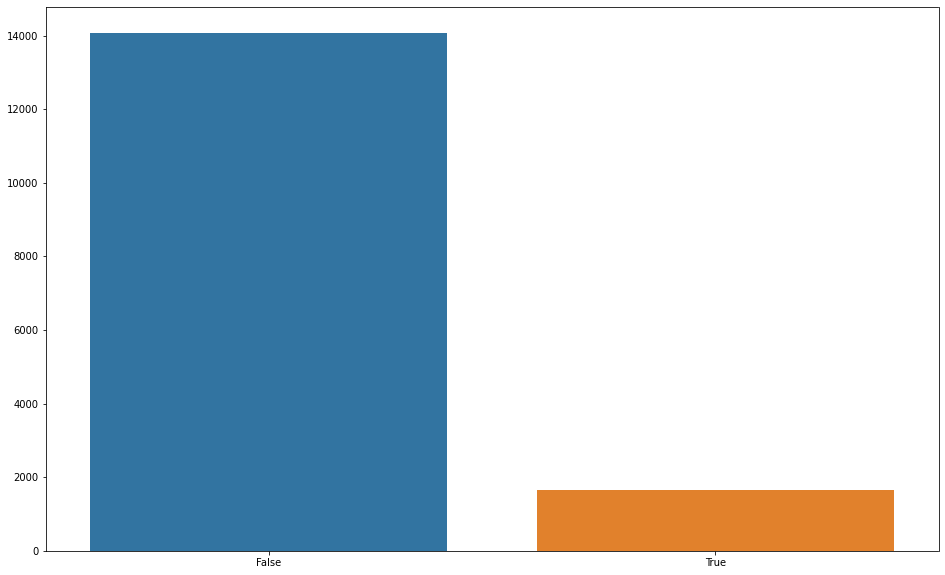

In [223]:
plt.figure(figsize=(16,10))
sns.barplot(x=data['verified'].value_counts().index, y=data['verified'].value_counts().values)

<AxesSubplot:>

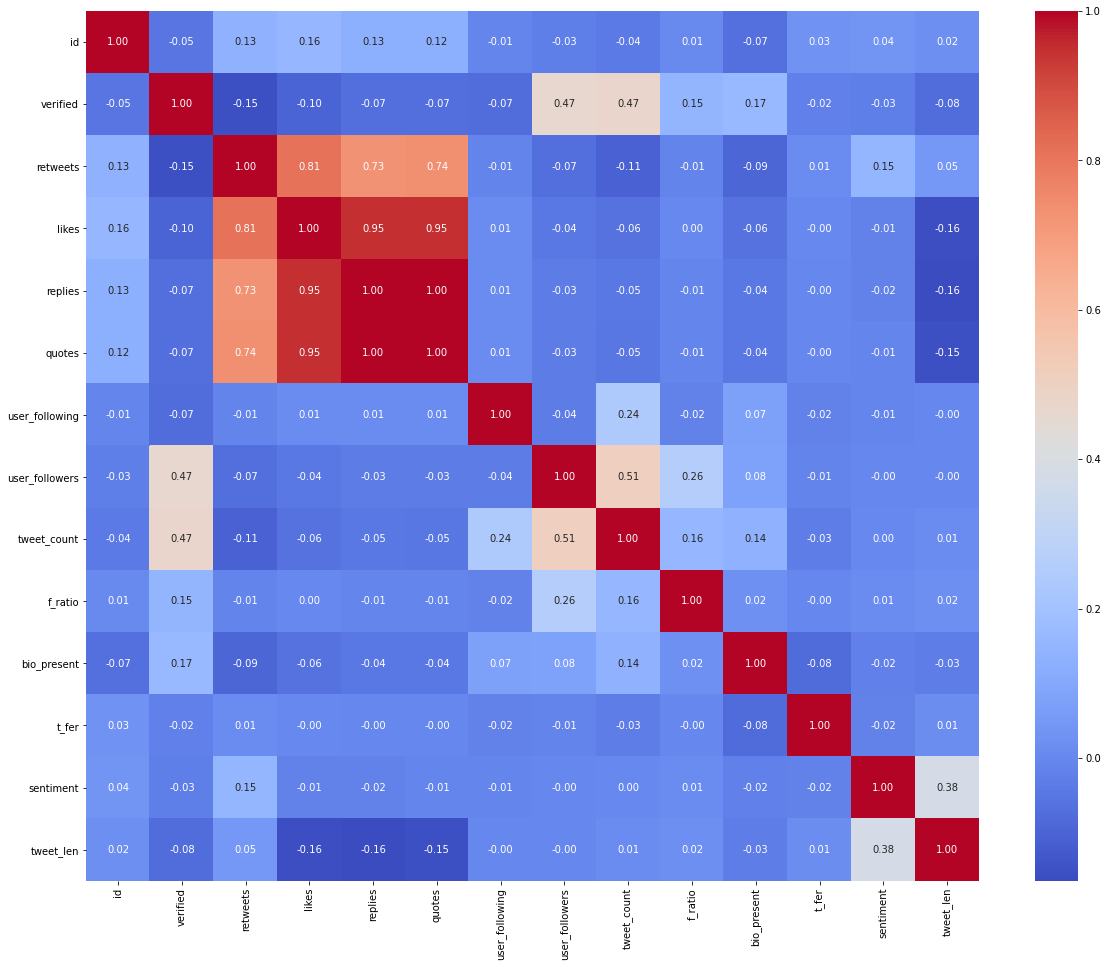

In [224]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

<AxesSubplot:xlabel='date', ylabel='Density'>

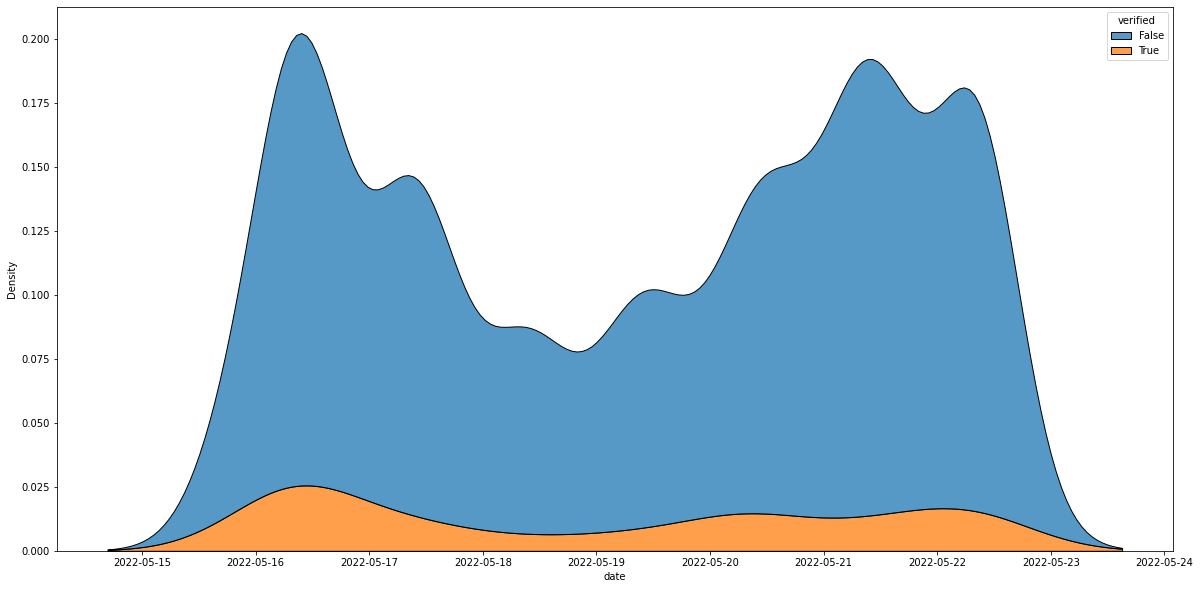

In [225]:
plt.figure(figsize=(20,10))
sns.kdeplot(data = data, x='date', hue='verified', multiple="stack")

<AxesSubplot:>

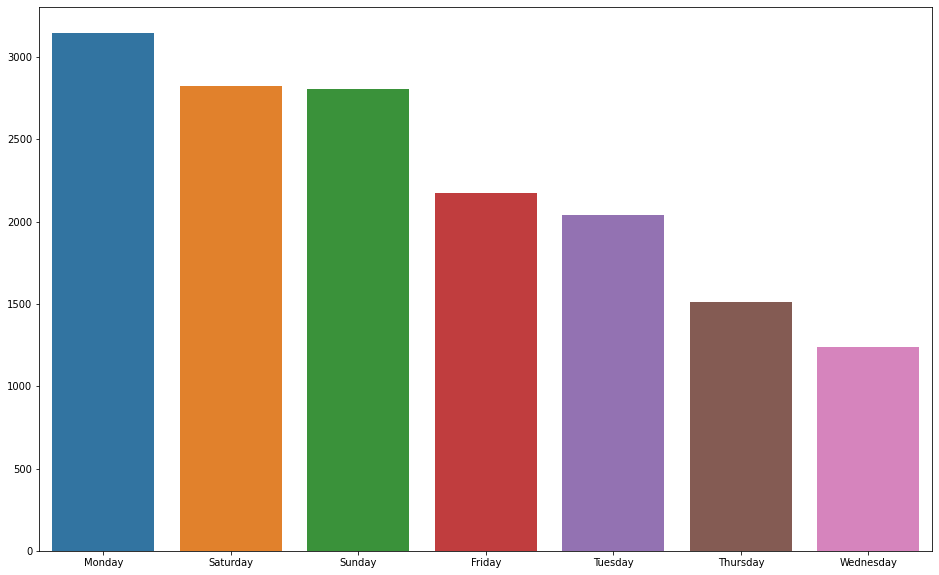

In [226]:
plt.figure(figsize=(16,10))
sns.barplot(x=data['day'].value_counts().index, y=data['day'].value_counts().values)

<AxesSubplot:xlabel='f_ratio', ylabel='Count'>

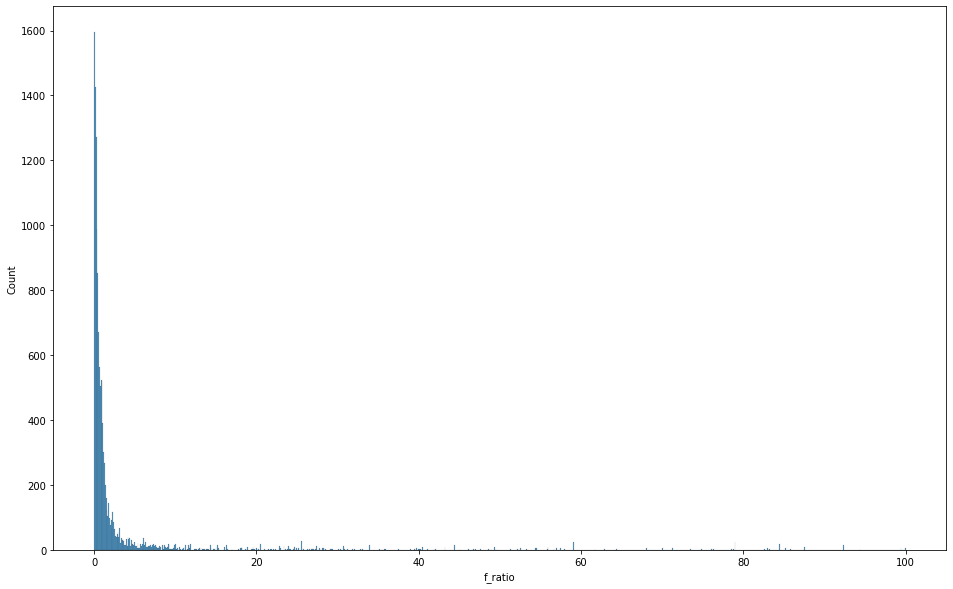

In [227]:
plt.figure(figsize=(16,10))
sns.histplot(data['f_ratio'], binrange=[0,100])

<AxesSubplot:xlabel='f_ratio', ylabel='Count'>

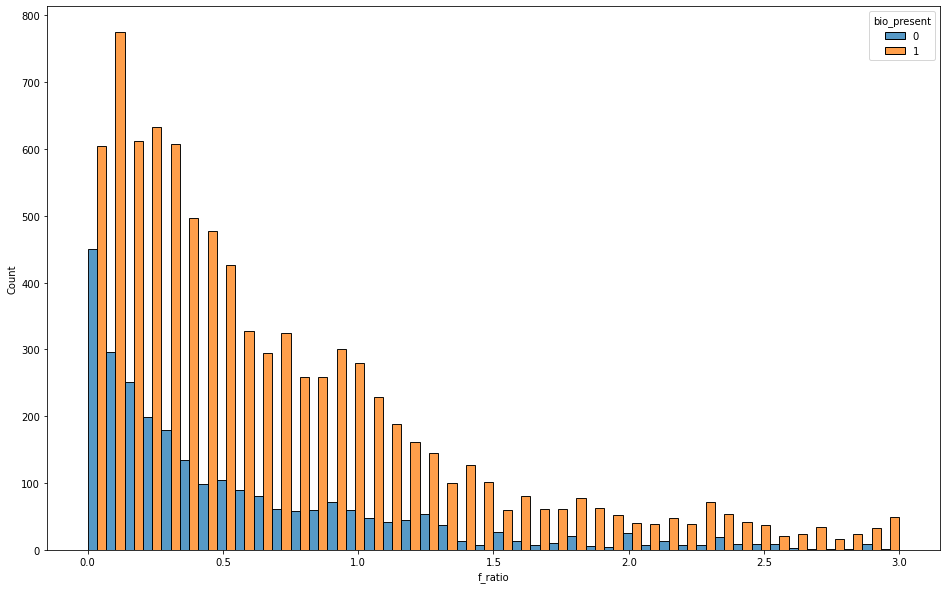

In [228]:
plt.figure(figsize=(16,10))
sns.histplot(data = data, x = 'f_ratio', hue = 'bio_present', binrange=[0,3], multiple='dodge')

<AxesSubplot:xlabel='lang', ylabel='Count'>

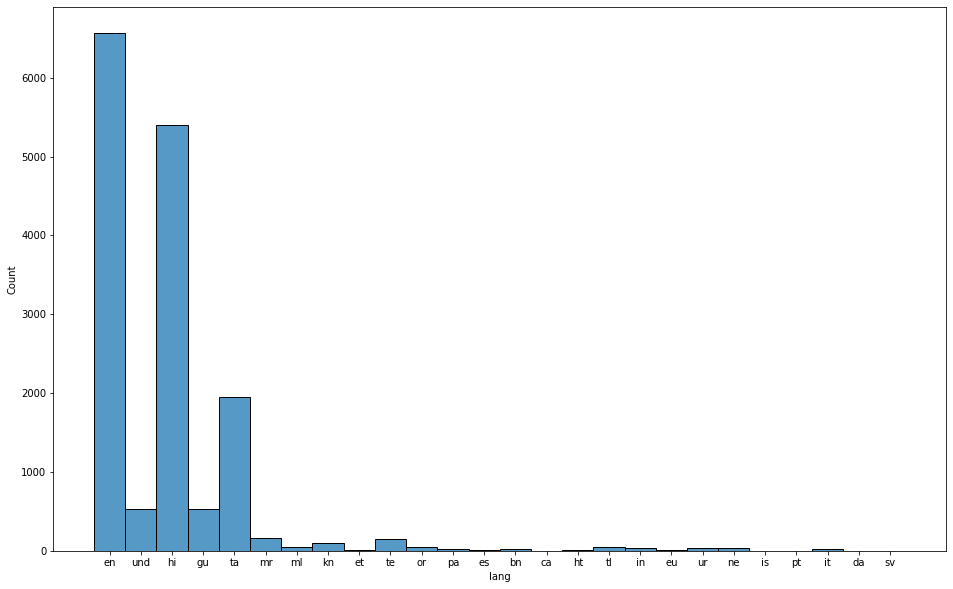

In [229]:
plt.figure(figsize=(16,10))
sns.histplot(data=data, x='lang')

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

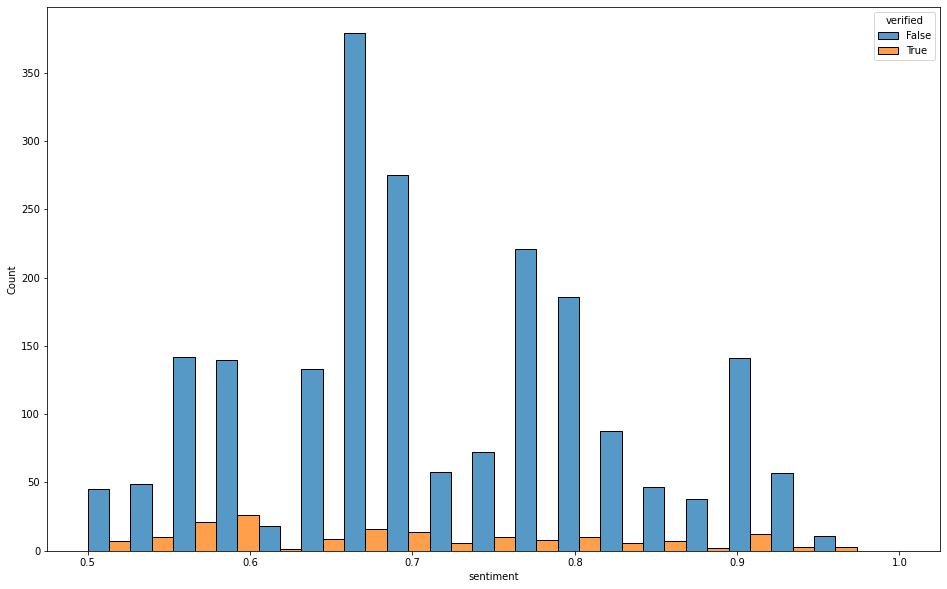

In [230]:
plt.figure(figsize=(16,10))
sns.histplot(data = data, x = 'sentiment', hue='verified',multiple='dodge' , binrange=[0.5,1])

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

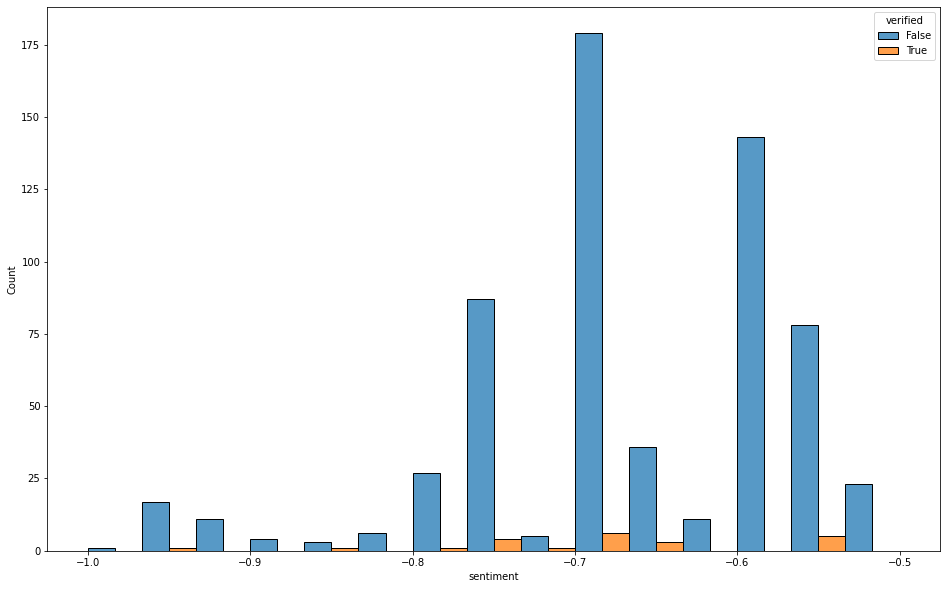

In [231]:
plt.figure(figsize=(16,10))
sns.histplot(data = data, x = 'sentiment', hue='verified',multiple='dodge' , binrange=[-1,-0.5])

<AxesSubplot:xlabel='tweet_len', ylabel='sentiment'>

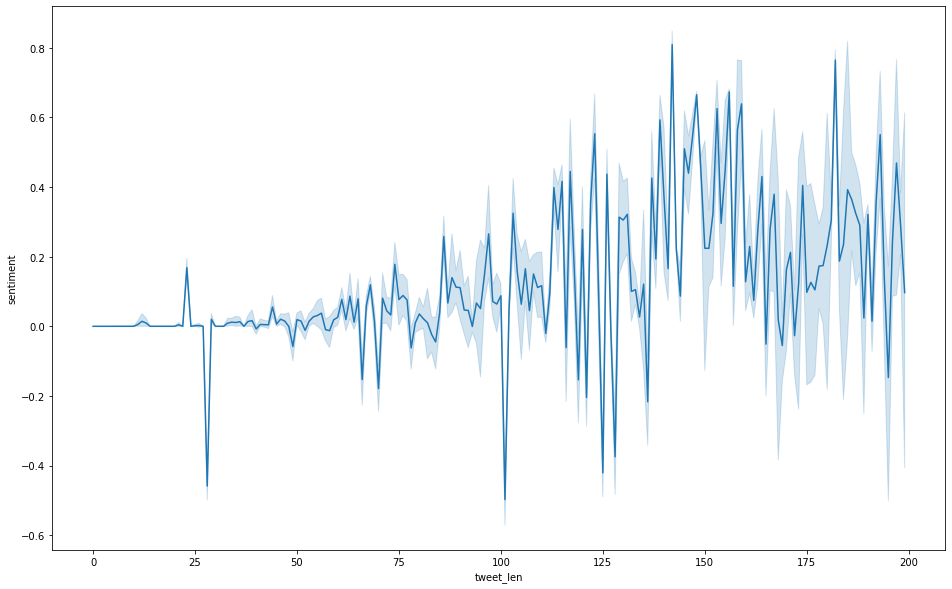

In [232]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data[data['tweet_len'] < 200], x='tweet_len', y='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='likes'>

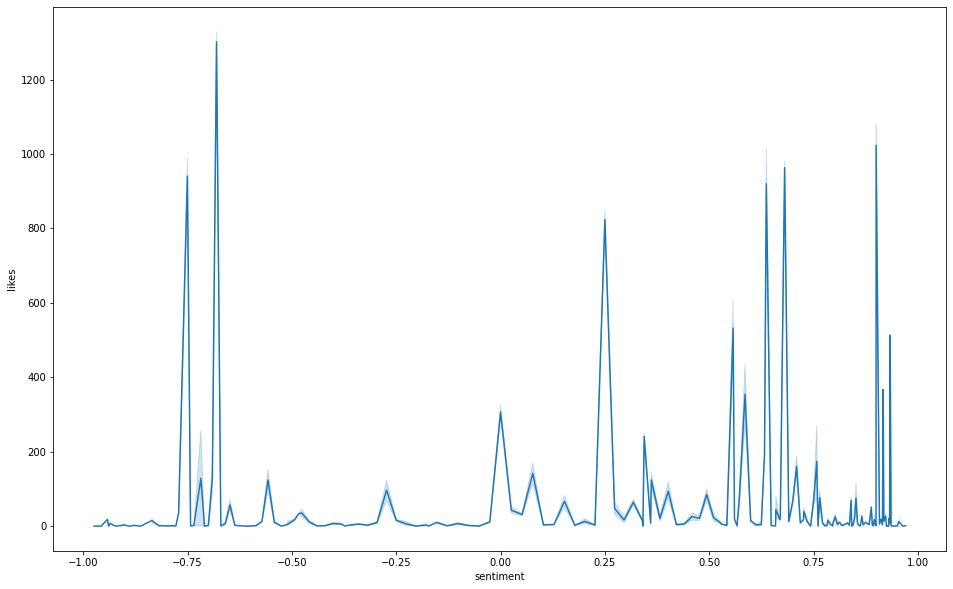

In [233]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data, y='likes', x='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='retweets'>

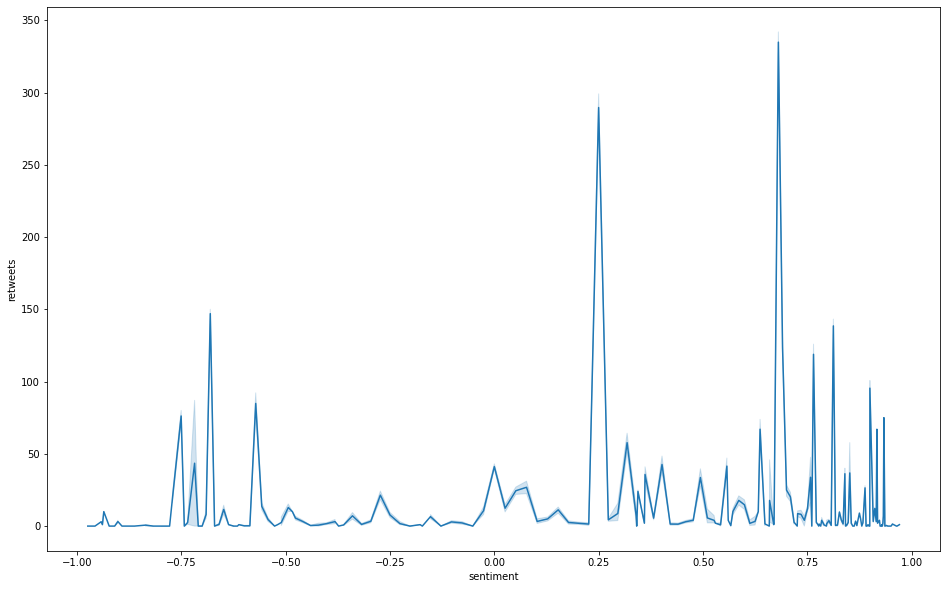

In [234]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data, y='retweets', x='sentiment')

In [235]:
mayBots = data[(data['verified'] == False) & (data['f_ratio'] < 0.1) & ((data['sentiment'] > 0.6) | (data['sentiment'] < -0.6)) & (data['lang'] == 'en') & (data['bio_present'] == 0)]

In [236]:
mayBots.shape

(84, 23)

In [237]:
mayBots.head()

,id,date,username,name,verified,text,lang,retweets,likes,replies,...,user_followers,tweet_count,day,f_ratio,bio_present,t_fer,text_tokens,text_lemmatized,sentiment,tweet_len
416,1528355438562930688,2022-05-22 12:41:46+00:00,HeenaJo94700707,Heena Joshi,False,india looks boost investment improve supply ch...,en,20,126,2,...,2,164,Sunday,0.010638,0,8.200000e+01,"[india, looks, boost, investment, improve, sup...",india look boost investment improve supply cha...,0.7506,126
473,1528350522771935232,2022-05-22 12:22:14+00:00,PiyushS64573478,Piyush Sharma,False,india looks boost investment improve supply ch...,en,9,56,2,...,59,2520,Sunday,0.023311,0,4.271186e+01,"[india, looks, boost, investment, improve, sup...",india look boost investment improve supply cha...,0.7506,117
489,1528348915006943232,2022-05-22 12:15:51+00:00,ReaganP40624742,Reagan Perez,False,india looks boost investment improve supply ch...,en,0,0,0,...,0,33,Sunday,0.000000,0,3.300000e+08,"[india, looks, boost, investment, improve, sup...",india look boost investment improve supply cha...,0.7506,126
1202,1528284085092634624,2022-05-22 07:58:14+00:00,krajiv681,krajiv68,False,narendramodi pls quote golden words great man ...,en,0,0,0,...,27,2393,Sunday,0.032927,0,8.862963e+01,"[narendramodi, pls, quote, golden, words, grea...",narendramodi pls quote golden word great man c...,0.6908,187
1351,1528272772522074112,2022-05-22 07:13:17+00:00,Pritam35066008,Pritam,False,shuttler lakshya sen fulfils promise gifts alm...,en,93,1284,6,...,87,25211,Sunday,0.050376,0,2.897816e+02,"[shuttler, lakshya, sen, fulfils, promise, gif...",shuttler lakshya sen fulfil promise gift almor...,0.6369,115


In [238]:
mayBots.tail()

,id,date,username,name,verified,text,lang,retweets,likes,replies,...,user_followers,tweet_count,day,f_ratio,bio_present,t_fer,text_tokens,text_lemmatized,sentiment,tweet_len
14884,1526061238433681411,2022-05-16 04:45:26+00:00,anshulbisht555,Anshul,False,thomas cup winners thank pm modi motivating en...,en,75,513,6,...,5,509,Monday,0.084746,0,101.80,"[thomas, cup, winners, thank, pm, modi, motiva...",thomas cup winner thank pm modi motivate encou...,0.9337,123
14891,1526060842730418176,2022-05-16 04:43:52+00:00,ehsan230564,Mohammed Ehsan,False,ndtv indiatoday india uttarpradeshelections in...,en,1,0,1,...,1,147,Monday,0.034483,0,147.00,"[ndtv, indiatoday, india, uttarpradeshelection...",ndtv indiatoday india uttarpradeshelections in...,0.6908,217
15459,1525916798830317568,2022-05-15 19:11:29+00:00,Ajaykishor14,ajay kishor,False,piyushgoyal drsjaishankar india back dr manmoh...,en,0,0,0,...,4,15,Sunday,0.093023,0,3.75,"[piyushgoyal, drsjaishankar, india, back, dr, ...",piyushgoyal drsjaishankar india back dr manmoh...,-0.6157,199
15461,1525913112578490368,2022-05-15 18:56:50+00:00,SabalJaiswal,sabal jaiswal,False,pm modi calls indian team historic thomas cup ...,en,44,472,5,...,1,3,Sunday,0.028571,0,3.00,"[pm, modi, calls, indian, team, historic, thom...",pm modi call indian team historic thomas cup w...,0.7650,146
15677,1525877763479326720,2022-05-15 16:36:22+00:00,HemantY28670109,Hemant Yadav,False,pm modi calls indian team historic thomas cup ...,en,44,472,5,...,5,1472,Sunday,0.025773,0,294.40,"[pm, modi, calls, indian, team, historic, thom...",pm modi call indian team historic thomas cup w...,0.7650,146


In [239]:
mayBots['day'].value_counts()

Saturday     25
Friday       16
Sunday       15
Tuesday      11
Wednesday     8
Monday        7
Thursday      2
Name: day, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='username'>

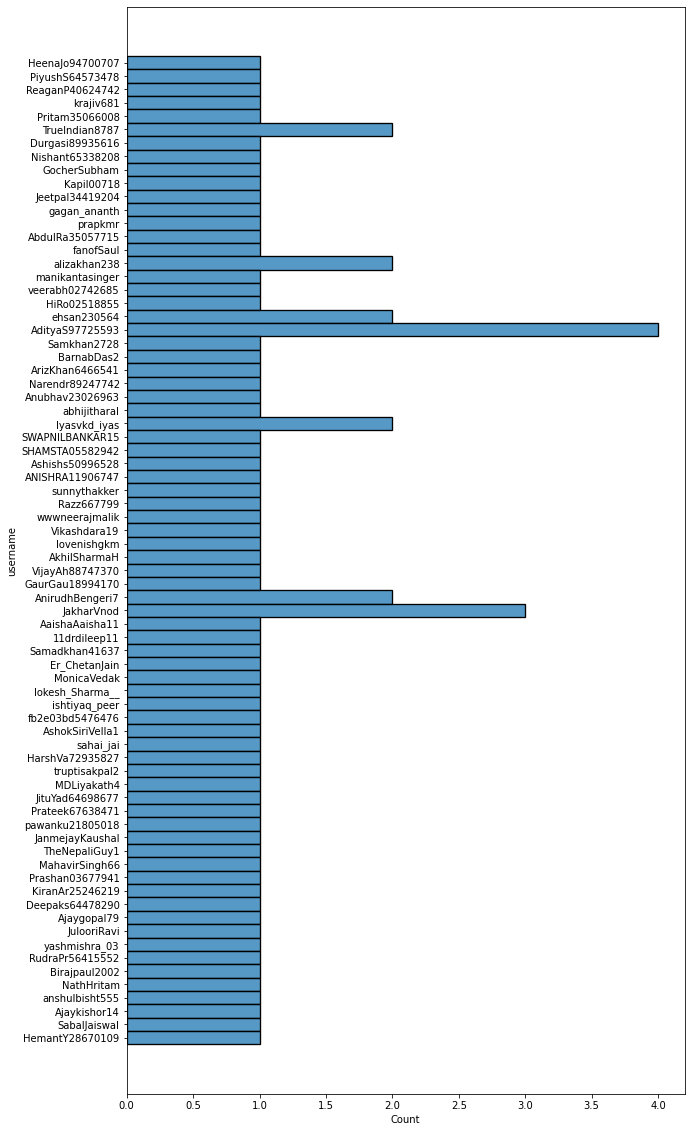

In [240]:
plt.figure(figsize=(10,20))
sns.histplot(data=mayBots,y='username')

<AxesSubplot:>

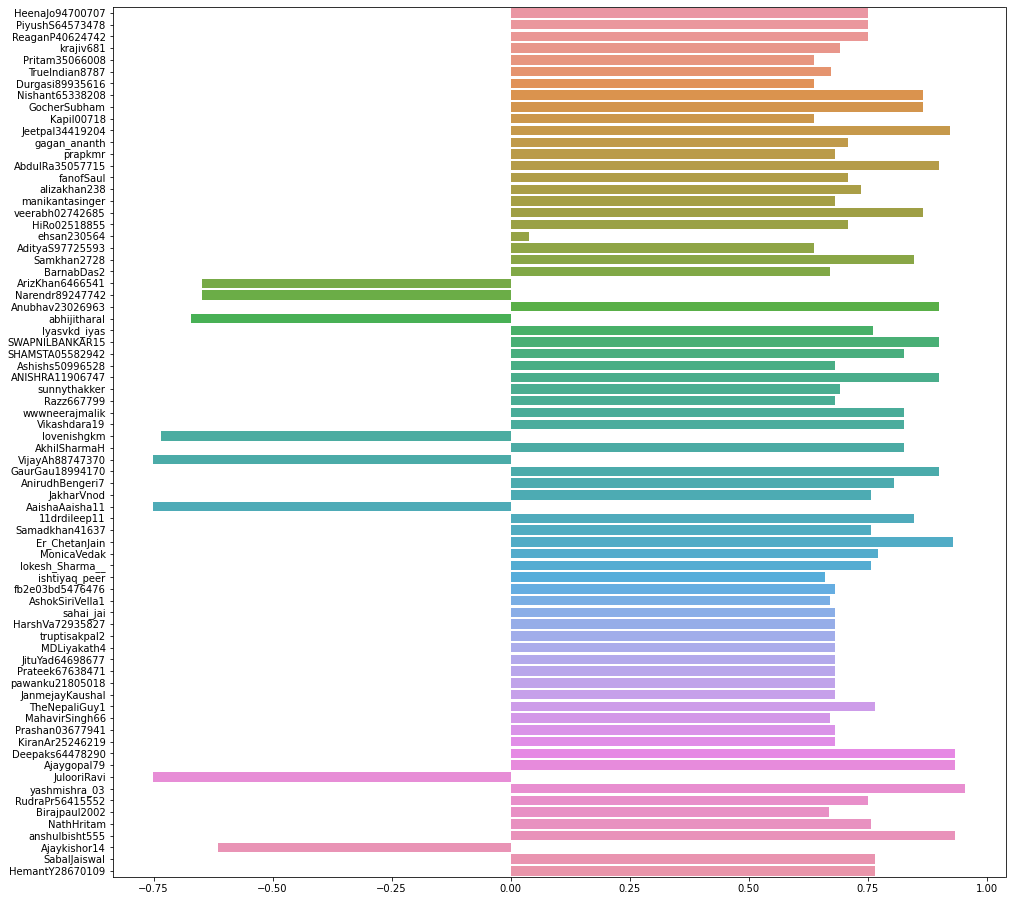

In [241]:
users = mayBots['username'].unique()
user_sentiment = []
for user in users:
    temp = mayBots[mayBots['username'] == user]['sentiment']
    user_sentiment.append(temp.mean())
plt.figure(figsize=(16,16))
sns.barplot(y=users, x=user_sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='t_fer'>

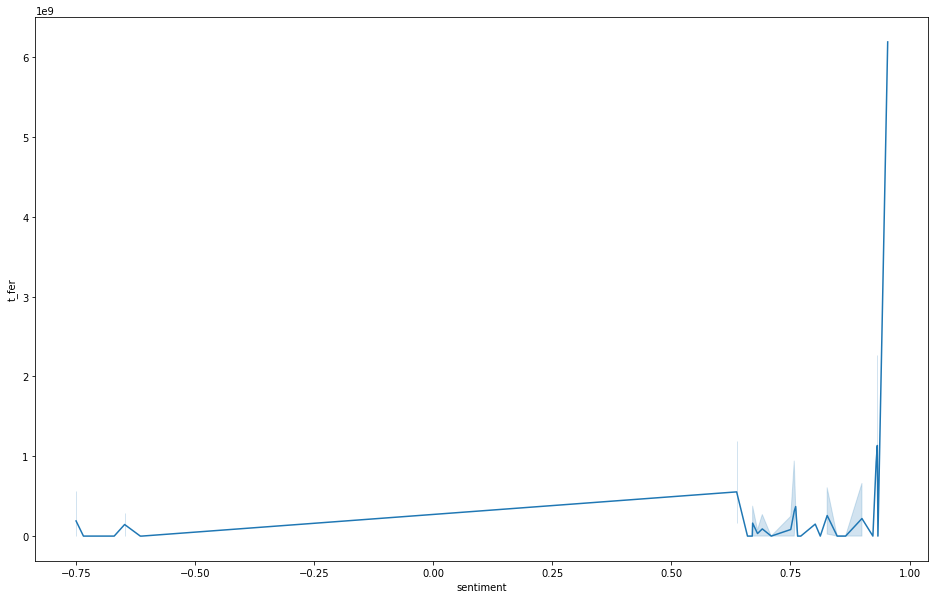

In [242]:
plt.figure(figsize=(16,10))
sns.lineplot(y=mayBots['t_fer'], x=mayBots['sentiment'])

<AxesSubplot:xlabel='t_fer', ylabel='Density'>

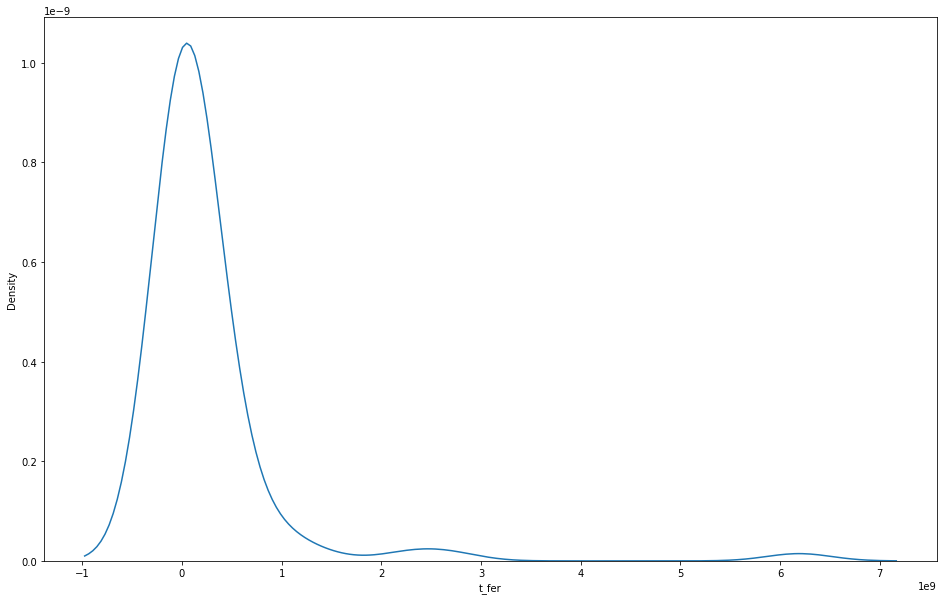

In [243]:
plt.figure(figsize=(16,10))
sns.kdeplot(mayBots['t_fer'])

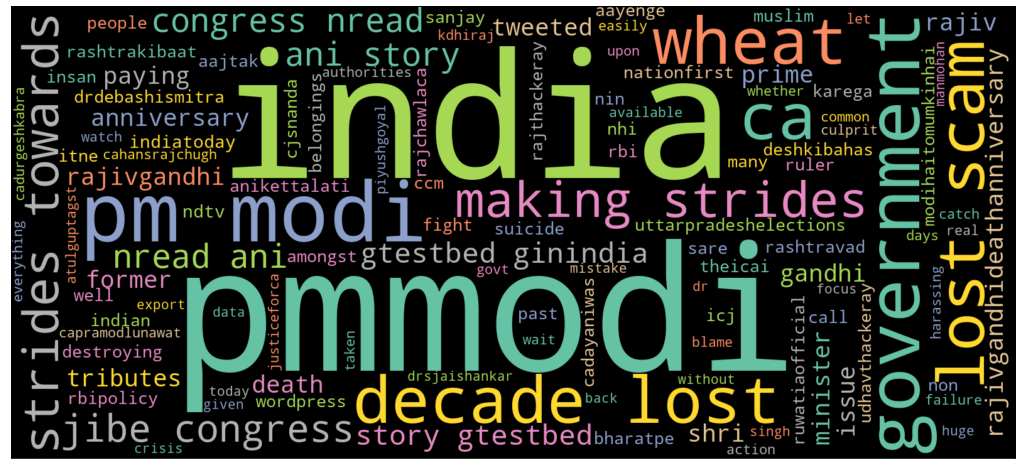

In [244]:
plt.figure(figsize=(18,15))
negative = mayBots[mayBots['sentiment'] < 0].text_tokens
negative = [" ".join(negative.values[i]) for i in range(len(negative))]
negative = [" ".join(negative)][0]
wc = WordCloud(min_font_size=3,max_words=200,width=1600,height=720, colormap = 'Set2', background_color='black').generate(negative)

plt.imshow(wc,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

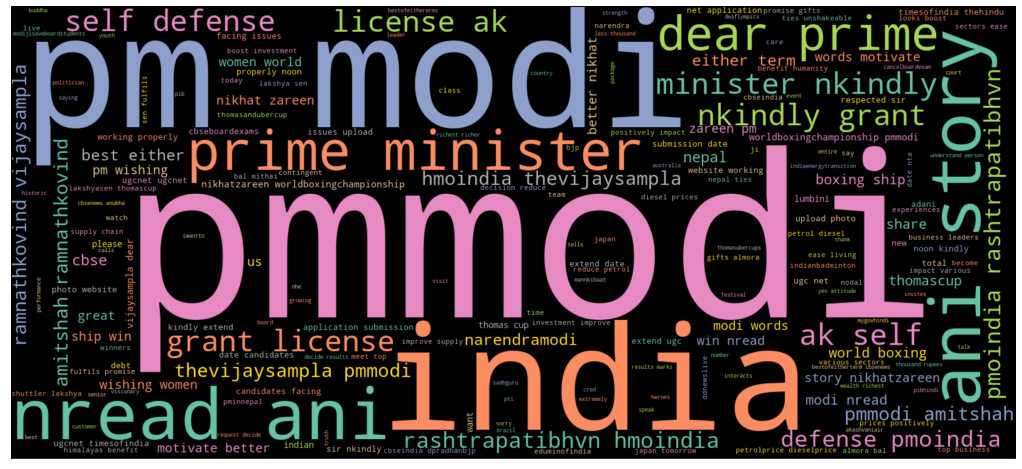

In [245]:
plt.figure(figsize=(18,15))
positive = mayBots[mayBots['sentiment'] > 0].text_tokens
positive = [" ".join(positive.values[i]) for i in range(len(positive))]
positive = [" ".join(positive)][0]
wc = WordCloud(min_font_size=3,max_words=200,width=1600,height=720, colormap = 'Set2', background_color='black').generate(positive)

plt.imshow(wc,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

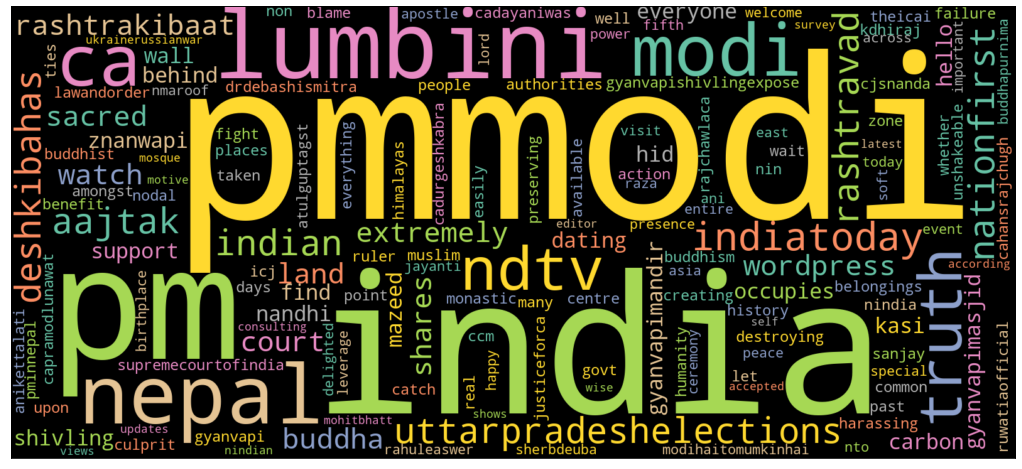

In [246]:
plt.figure(figsize=(18,15))
long_tweets = mayBots[mayBots['tweet_len'] > 200].text_tokens
long_tweets = [" ".join(long_tweets.values[i]) for i in range(len(long_tweets))]
long_tweets = [" ".join(long_tweets)][0]
wc = WordCloud(min_font_size=3,max_words=200,width=1600,height=720, colormap = 'Set2', background_color='black').generate(long_tweets)

plt.imshow(wc,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

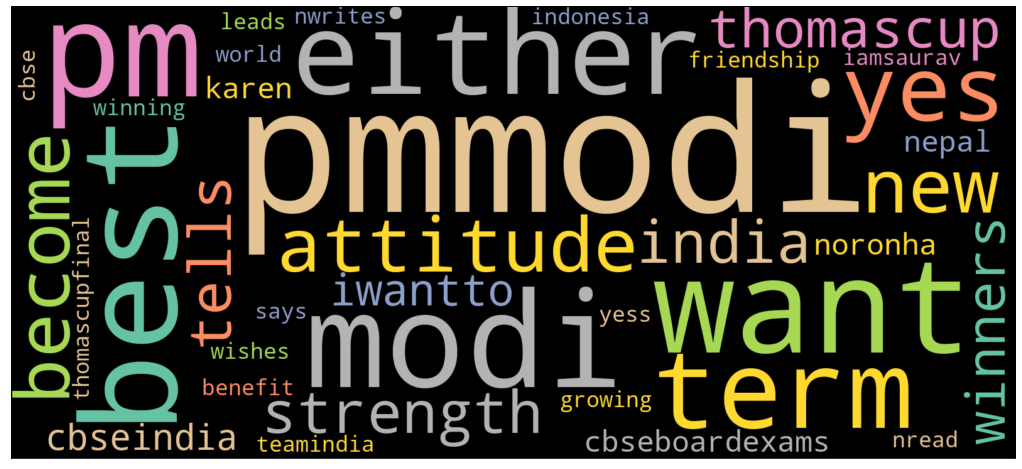

In [247]:
plt.figure(figsize=(18,15))
long_tweets = mayBots[mayBots['tweet_len'] < 100].text_tokens
long_tweets = [" ".join(long_tweets.values[i]) for i in range(len(long_tweets))]
long_tweets = [" ".join(long_tweets)][0]
wc = WordCloud(min_font_size=3,max_words=200,width=1600,height=720, colormap = 'Set2', background_color='black').generate(long_tweets)

plt.imshow(wc,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

In [248]:
mayBots.dtypes

id                               int64
date               datetime64[ns, UTC]
username                        object
name                            object
verified                          bool
text                            object
lang                            object
retweets                         int64
likes                            int64
replies                          int64
quotes                           int64
user_bio                        object
user_following                   int64
user_followers                   int64
tweet_count                      int64
day                             object
f_ratio                        float64
bio_present                      int64
t_fer                          float64
text_tokens                     object
text_lemmatized                 object
sentiment                      float64
tweet_len                        int64
dtype: object